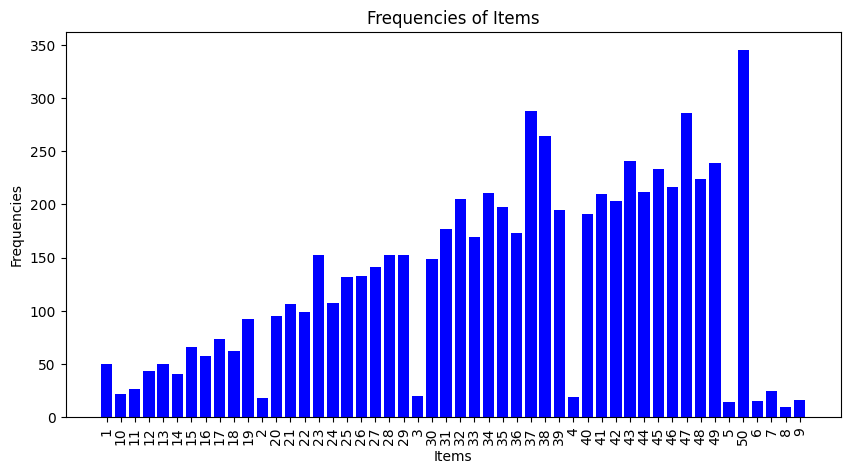

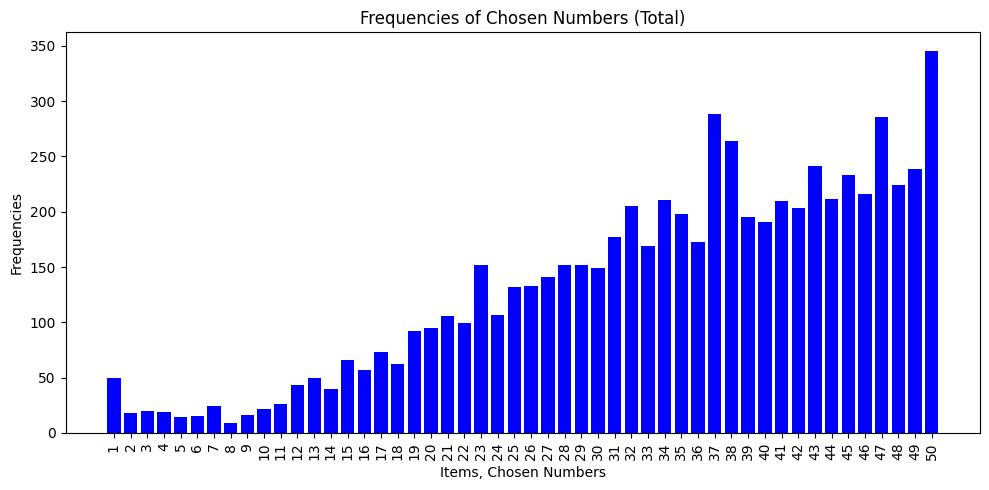

In [1]:
import os
import json

def get_frequencies(json):
    # Extract the data from the JSON
    data = json["response"]["data"]
    
    # Initialize a dictionary to store the frequencies
    frequencies = {}
    
    # Iterate through the data and count the frequencies
    for item in data:
        if isinstance(item[0], str):
            key = item[0]
        else:
            key = str(item[0])
        value = int(item[1])
        
        if key in frequencies:
            frequencies[key] += value
        else:
            frequencies[key] = value
    
    return frequencies

def iterate_over_days():
    all_frequencies = {}
    
    # Iterate over all files in the /data directory
    for filename in os.listdir('data/'):
        if filename.endswith('.json'):
            filepath = os.path.join('data/', filename)
            
            # Open and load the JSON file
            with open(filepath, 'r') as file:
                json_data = json.load(file)
                
                # Get frequencies from the JSON data
                frequencies = get_frequencies(json_data)
                
                # Merge the frequencies into the all_frequencies dictionary
                for key, value in frequencies.items():
                    if key in all_frequencies:
                        all_frequencies[key] += value
                    else:
                        all_frequencies[key] = value
    
    return all_frequencies

# Call the function to iterate over days and get the frequencies
all_frequencies = iterate_over_days()

import matplotlib.pyplot as plt

# Sort the frequencies dictionary by key
sorted_frequencies = dict(sorted(all_frequencies.items()))

# Extract keys and values for plotting
keys = list(sorted_frequencies.keys())
values = list(sorted_frequencies.values())

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(keys, values, color='blue')

# Add title and labels
plt.title('Frequencies of Items')
plt.xlabel('Items')
plt.ylabel('Frequencies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Sort the frequencies dictionary by key as integers
sorted_frequencies = dict(sorted(all_frequencies.items(), key=lambda item: int(item[0])))

# Extract keys and values for plotting
keys = list(sorted_frequencies.keys())
values = list(sorted_frequencies.values())

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(keys, values, color='blue')

# Add title and labels
plt.title('Frequencies of Chosen Numbers (Total)')
plt.xlabel('Items, Chosen Numbers')
plt.ylabel('Frequencies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()